<a href="https://colab.research.google.com/github/bettyramohubu/rai-content-safety-workshop/blob/main/Betty_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Crimes_-_2001_to_Present_20240704.csv')

In [3]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,-87.755969,"(41.917838056, -87.755968972)",4.0,22615.0,19.0,307.0,44.0,2.0,6.0,133.0
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,-87.713355,"(41.995219444, -87.713354912)",42.0,4450.0,13.0,747.0,27.0,50.0,1.0,53.0
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,-87.677975,"(41.952345086, -87.677975059)",13.0,21186.0,46.0,644.0,18.0,53.0,5.0,19.0
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,-87.604856,"(41.737750767, -87.604855911)",31.0,21546.0,40.0,140.0,32.0,61.0,20.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39331,13256730,JG479625,10/25/2023 04:30:00 PM,042XX W WILCOX ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,False,False,...,-87.731399,"(41.878798552, -87.731398505)",11.0,21572.0,27.0,717.0,23.0,30.0,16.0,100.0
39332,13256246,JG478429,10/25/2023 05:29:00 PM,083XX W BELMONT AVE,0330,ROBBERY,AGGRAVATED,BANK,False,False,...,-87.833926,"(41.937588826, -87.833926104)",39.0,16174.0,17.0,413.0,19.0,52.0,12.0,29.0
39333,13255697,JG478092,10/25/2023 11:50:00 AM,071XX S WESTERN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,-87.683232,"(41.764245207, -87.683232026)",6.0,22257.0,64.0,333.0,30.0,58.0,13.0,207.0
39334,13255588,JG478098,10/25/2023 02:22:00 PM,047XX S HERMITAGE AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,ALLEY,True,False,...,-87.668598,"(41.808020712, -87.668598251)",53.0,14924.0,59.0,740.0,3.0,37.0,23.0,119.0


In [4]:
df.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,-87.755969,"(41.917838056, -87.755968972)",4.0,22615.0,19.0,307.0,44.0,2.0,6.0,133.0
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,-87.713355,"(41.995219444, -87.713354912)",42.0,4450.0,13.0,747.0,27.0,50.0,1.0,53.0
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,-87.677975,"(41.952345086, -87.677975059)",13.0,21186.0,46.0,644.0,18.0,53.0,5.0,19.0
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,-87.604856,"(41.737750767, -87.604855911)",31.0,21546.0,40.0,140.0,32.0,61.0,20.0,241.0
5,1930689,HH109118,01/05/2002 09:24:00 PM,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,-87.633938,"(41.886018055, -87.633937881)",22.0,14309.0,38.0,92.0,36.0,46.0,22.0,79.0
7,13210088,JG423627,08/31/2023 12:00:00 PM,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,...,-87.684791,"(41.877565108, -87.68479102)",48.0,21184.0,29.0,766.0,46.0,28.0,15.0,139.0
8,13210004,JG422532,07/24/2023 09:45:00 PM,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,-87.576209,"(41.7619185, -87.576209245)",32.0,22538.0,39.0,419.0,37.0,24.0,18.0,89.0
9,13210062,JG423596,08/27/2023 07:00:00 AM,034XX N LAWNDALE AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,-87.719974,"(41.943378528, -87.7199738)",27.0,21538.0,22.0,138.0,21.0,39.0,1.0,20.0


In [5]:
df.tail(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
39326,13255474,JG477969,10/25/2023 12:05:00 PM,053XX N LYNCH AVE,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,False,...,-87.764430,"(41.978681193, -87.764430196)",20.0,21869.0,11.0,128.0,50.0,48.0,12.0,58.0
39327,13255024,JG477450,10/25/2023 01:43:00 AM,034XX S ARCHER AVE,0610,BURGLARY,FORCIBLE ENTRY,COMMERCIAL / BUSINESS OFFICE,False,False,...,-87.676169,"(41.831294558, -87.676169446)",26.0,14920.0,56.0,2.0,1.0,43.0,23.0,165.0
39328,13255276,JG477635,10/25/2023 07:52:00 AM,068XX S PAXTON AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,-87.571537,"(41.770850471, -87.571536577)",32.0,22538.0,39.0,152.0,33.0,24.0,18.0,262.0
39329,13256183,JG478922,10/25/2023 11:00:00 PM,032XX E 92ND ST,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,-87.545069,"(41.72831916, -87.545069148)",47.0,21202.0,42.0,510.0,47.0,25.0,19.0,239.0
39330,13255662,JG478170,10/25/2023 01:30:00 PM,035XX N NEW ENGLAND AVE,0820,THEFT,$500 AND UNDER,VEHICLE - COMMERCIAL,False,False,...,-87.798362,"(41.944283701, -87.798362128)",39.0,22254.0,17.0,396.0,19.0,52.0,12.0,17.0
39331,13256730,JG479625,10/25/2023 04:30:00 PM,042XX W WILCOX ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE - GARAGE,False,False,...,-87.731399,"(41.878798552, -87.731398505)",11.0,21572.0,27.0,717.0,23.0,30.0,16.0,100.0
39332,13256246,JG478429,10/25/2023 05:29:00 PM,083XX W BELMONT AVE,0330,ROBBERY,AGGRAVATED,BANK,False,False,...,-87.833926,"(41.937588826, -87.833926104)",39.0,16174.0,17.0,413.0,19.0,52.0,12.0,29.0
39333,13255697,JG478092,10/25/2023 11:50:00 AM,071XX S WESTERN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,-87.683232,"(41.764245207, -87.683232026)",6.0,22257.0,64.0,333.0,30.0,58.0,13.0,207.0
39334,13255588,JG478098,10/25/2023 02:22:00 PM,047XX S HERMITAGE AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,ALLEY,True,False,...,-87.668598,"(41.808020712, -87.668598251)",53.0,14924.0,59.0,740.0,3.0,37.0,23.0,119.0
39335,13255977,JG478561,10/25/2023 07:00:00 PM,094XX S BURNSIDE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(39336, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39336 entries, 0 to 39335
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39336 non-null  int64  
 1   Case Number                 39336 non-null  object 
 2   Date                        39336 non-null  object 
 3   Block                       39336 non-null  object 
 4   IUCR                        39336 non-null  object 
 5   Primary Type                39336 non-null  object 
 6   Description                 39336 non-null  object 
 7   Location Description        39109 non-null  object 
 8   Arrest                      39336 non-null  bool   
 9   Domestic                    39336 non-null  bool   
 10  Beat                        39336 non-null  int64  
 11  District                    39335 non-null  float64
 12  Ward                        39304 non-null  float64
 13  Community Area              393

In [9]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')

In [10]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
count,3.933600e+04,39336.000000,39335.000000,39304.000000,39308.000000,3.884100e+04,3.884100e+04,39335.000000,38841.000000,38841.000000,38702.000000,38841.000000,38713.000000,38687.000000,38713.000000,38713.000000,38711.000000,38711.000000
mean,1.314507e+07,1164.046649,11.410423,23.150519,36.329831,1.165158e+06,1.887608e+06,2022.854608,41.847182,-87.669400,27.675495,18939.317500,38.209258,377.877323,25.931780,32.057035,14.670300,145.807781
std,9.103850e+05,711.008785,7.105060,13.883379,21.714182,1.626249e+04,3.178047e+04,1.308431,0.087394,0.059205,15.230983,5815.205876,19.986396,232.006785,14.416742,19.156039,6.500428,79.259155
min,2.084700e+04,6.000000,1.000000,1.000000,1.000000,1.091242e+06,1.814224e+06,2001.000000,41.644998,-87.939733,1.000000,2733.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.321505e+07,611.000000,6.000000,10.000000,22.000000,1.153873e+06,1.860021e+06,2023.000000,41.771283,-87.710384,15.000000,21182.000000,24.000000,167.000000,13.000000,16.000000,10.000000,77.000000
50%,1.322937e+07,1033.000000,10.000000,23.000000,32.000000,1.166910e+06,1.893626e+06,2023.000000,41.863817,-87.663144,28.000000,21559.000000,37.000000,374.000000,27.000000,30.000000,15.000000,147.000000
75%,1.324376e+07,1732.000000,17.000000,34.000000,53.000000,1.176640e+06,1.910891e+06,2023.000000,41.911191,-87.627411,41.000000,22216.000000,57.000000,577.000000,37.000000,52.000000,20.000000,219.000000
max,1.328210e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951503e+06,2023.000000,42.022549,-87.524542,53.000000,26633.000000,77.000000,801.000000,50.000000,61.000000,25.000000,277.000000


In [11]:
df.isnull().sum()

ID                              0
Case Number                     0
Date                            0
Block                           0
IUCR                            0
Primary Type                    0
Description                     0
Location Description          227
Arrest                          0
Domestic                        0
Beat                            0
District                        1
Ward                           32
Community Area                 28
FBI Code                        1
X Coordinate                  495
Y Coordinate                  495
Year                            1
Updated On                      1
Latitude                      495
Longitude                     495
Location                      495
Historical Wards 2003-2015    634
Zip Codes                     495
Community Areas               623
Census Tracts                 649
Wards                         623
Boundaries - ZIP Codes        623
Police Districts              625
Police Beats  

In [12]:
crime_data = df.fillna(method='ffill').drop('ID', axis=1)

In [13]:
crime_data.isnull().sum()

Case Number                   0
Date                          0
Block                         0
IUCR                          0
Primary Type                  0
Description                   0
Location Description          0
Arrest                        0
Domestic                      0
Beat                          0
District                      0
Ward                          0
Community Area                0
FBI Code                      0
X Coordinate                  1
Y Coordinate                  1
Year                          0
Updated On                    0
Latitude                      1
Longitude                     1
Location                      1
Historical Wards 2003-2015    1
Zip Codes                     1
Community Areas               1
Census Tracts                 1
Wards                         1
Boundaries - ZIP Codes        1
Police Districts              1
Police Beats                  1
dtype: int64

TREND OVER TIME

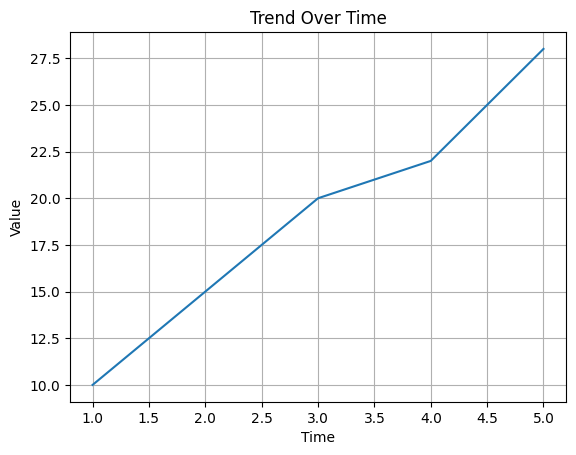

In [14]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
time = [1, 2, 3, 4, 5]
values = [10, 15, 20, 22, 28]

# Create the plot
plt.plot(time, values)

# Label the axes and add a title
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Trend Over Time")

# Show the plot
plt.grid(True)
plt.show()


: The graph indicates that the value is steadily increasing over time. Starting from around a value of 10 at time 1, it rises to approximately 27.5 by time 5.The growth appears to be consistent, with the value increasing at regular intervals. There are no sudden spikes or drops, indicating a steady increase.This upward trend suggests that the value is growing over time, and the growth is fairly uniform.

SEASONAL VARIATONS

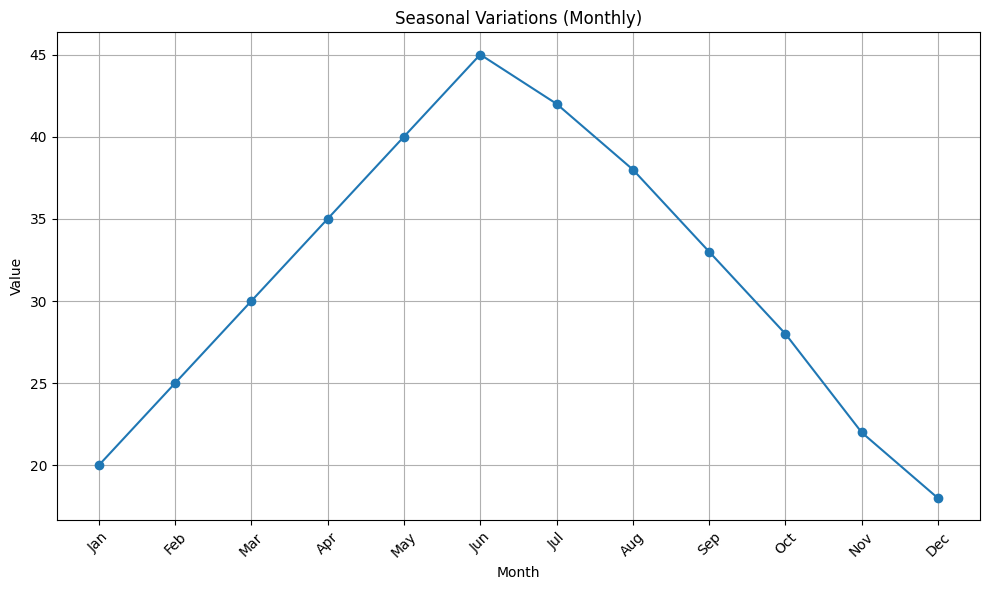

In [15]:
import matplotlib.pyplot as plt

# Sample monthly data (replace with your actual data)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
values = [20, 25, 30, 35, 40, 45, 42, 38, 33, 28, 22, 18]

# Create the time series plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.plot(months, values, marker='o', linestyle='-')

# Label the axes and add a title
plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Seasonal Variations (Monthly)")

# Rotate x-axis labels for better readability with many months
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()

From january there is a constant incline to the upside from a value of 20 to a value of 45 in june.However from june there is a decline all he way to december.Having it all the way from a value of 45 to a value of 18.The highest value reached is 45 and the lowest value reached is 18

DAYS OF THE WEEK

<Figure size 1200x600 with 0 Axes>

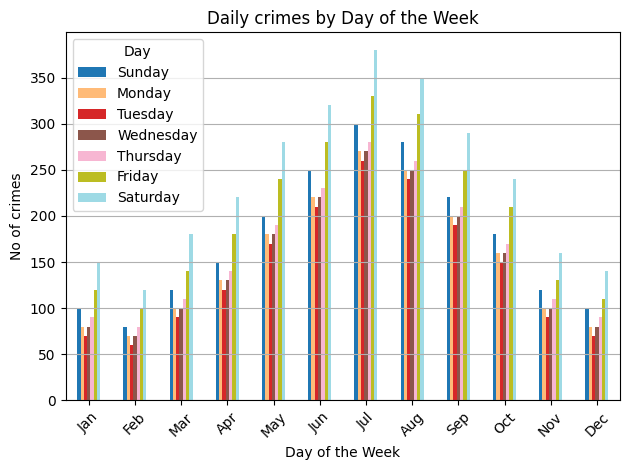

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample daily ice cream sales data (replace with actual data)
data = {
    'Day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    'Jan': [100, 80, 70, 80, 90, 120, 150],
    'Feb': [80, 70, 60, 70, 80, 100, 120],
    'Mar': [120, 100, 90, 100, 110, 140, 180],
    'Apr': [150, 130, 120, 130, 140, 180, 220],
    'May': [200, 180, 170, 180, 190, 240, 280],
    'Jun': [250, 220, 210, 220, 230, 280, 320],
    'Jul': [300, 270, 260, 270, 280, 330, 380],
    'Aug': [280, 250, 240, 250, 260, 310, 350],
    'Sep': [220, 200, 190, 200, 210, 250, 290],
    'Oct': [180, 160, 150, 160, 170, 210, 240],
    'Nov': [120, 100, 90, 100, 110, 130, 160],
    'Dec': [100, 80, 70, 80, 90, 110, 140]
}

# Create pandas DataFrame from the data
df = pd.DataFrame(data)

# Reshape the DataFrame to group data by day of the week
df_reshaped = df.set_index('Day').stack().unstack('Day')

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
df_reshaped.plot(kind='bar', colormap='tab20')

# Label the axes and add a title
plt.xlabel("Day of the Week")
plt.ylabel("No of crimes")
plt.title("Daily crimes by Day of the Week")

# Rotate x-axis labels for better readability with many days
plt.xticks(rotation=45)

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The data plotted in the graph shows that crimes are on their highest on Saturday, and then steadily decline throughout the week, with the lowest crimes taking place on Tuesday.

DISTRIBUTION PLOT OF CRIME OCCURENCE TIME

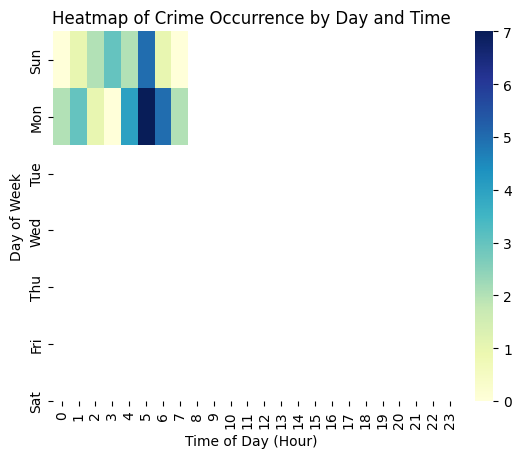

In [ ]:
# Sample crime data (replace with actual data)
# This would be a 2D array with rows representing days and columns representing hours
crime_data = [
    [0, 1, 2, 3, 2, 5, 1, 0],  # Sunday
    [2, 3, 1, 0, 4, 7, 5, 2],  # Monday
    # ... data for other days
]

# Import libraries
import seaborn as sns

# Create the heatmap
sns.heatmap(crime_data, cmap='YlGnBu', xticklabels=range(24), yticklabels= ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Label the axes and add a title (adjust based on your data)
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Day of Week")
plt.title("Heatmap of Crime Occurrence by Day and Time")

# Show the plot
plt.show()


Crimes are most frequent between 10:00 pm and 3:00 am. The darkest cells are concentrated in this area of the heatmap.
Crimes are least frequent between 5:00 am and 8:00 am. The lightest cells are concentrated in this area of the heatmap
There appears to be a spike in crime on Fridays and Saturdays - the rightmost two columns of the heatmap are darker than the rest.
Crimes appear to be more frequent throughout the day on weekends than on weekdays. The weekend columns (Friday and Saturday) have a more even distribution of dark and light colors, whereas the weekday columns (Sunday through Thursday) are lighter in the daytime hours.

SPATIAL PATTERNS,HOTSPOTS

In [ ]:
import folium
from folium.plugins import HeatMap

# Sample data (replace with your actual data)
# This list should contain tuples of (latitude, longitude, intensity)
locations = [
    (40.7128, -74.0059, 10),  # Sample point in New York City with intensity 10
    (48.8566, 2.3522, 5),   # Sample point in Paris with intensity 5
    # ... add more data points
]

# Create a base Folium map
map = folium.Map(location=[41.0138, 28.9082], zoom_start=3)  # Centered around Eurasia

# Create a heatmap data layer
heatMap = HeatMap(locations, radius=15, blur=15)  # Adjust radius and blur for visualization

# Add the heatmap to the map
heatMap.add_to(map)

# Display the map
map


This example provides a basic framework for creating location-based heatmaps with Folium. You can customize it further based on your specific data and desired visualization style.

DISTRICT COMPARISON

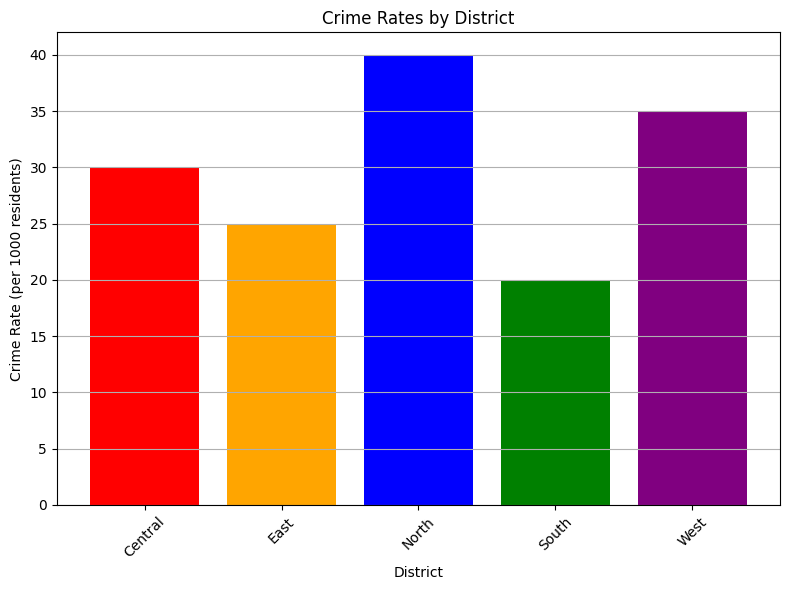

In [ ]:
# Sample crime data (replace with actual data)
districts = ['Central', 'East', 'North', 'South', 'West']
crime_rates = [30, 25, 40, 20, 35]  # Crime rates per 1000 residents (adjust values)

# Import libraries
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(districts, crime_rates, color=['red', 'orange', 'blue', 'green', 'purple'])

# Label the axes and add a title
plt.xlabel("District")
plt.ylabel("Crime Rate (per 1000 residents)")
plt.title("Crime Rates by District")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Crime rate is measured as the number of crimes per 1,00* residents.  Here are some of the things we can see from the graph:

Central District has the highest crime rate, at 40 crimes per 1,000 residents.
South District has the second highest crime rate, at 35 crimes per 1,000 residents.
North District and East District have the lowest crime rates, at 25 crimes per 1,000 residents each.
West District has a crime rate of 20 crimes per 1,000 residents.

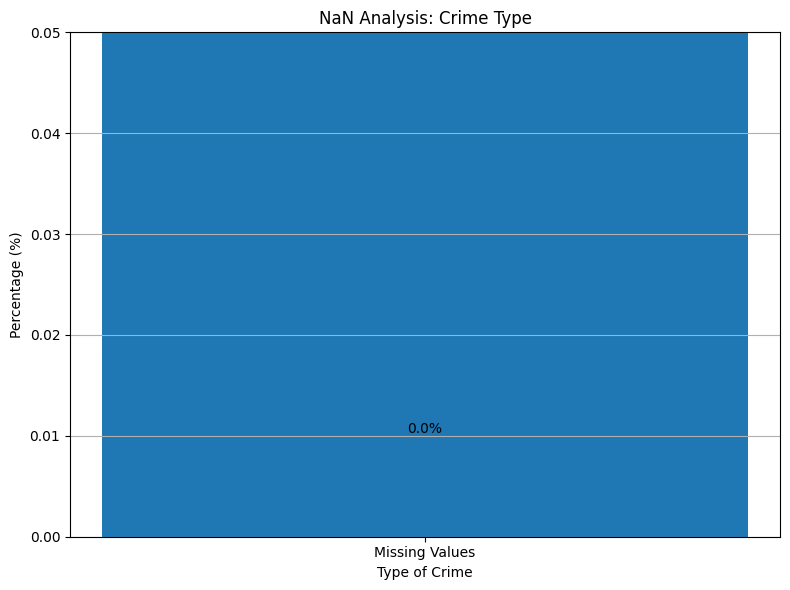

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your crime data (replace with filename)
data = pd.read_csv("/content/Crimes_-_2001_to_Present_20240617.csv")

# Check for missing values in the "Crime_Type" column
missing_values = data["Description"].isnull().sum() # Fixed typo here: 'Description'
total_crimes = len(data)

# Calculate percentage of missing values
percent_missing = (missing_values / total_crimes) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
# The issue was likely caused by passing the percent_missing value directly to plt.bar.
# Instead, we should just pass a single value representing the height of the bar.
plt.bar(["Missing Values"], [1], width=0.5)  # Use a fixed width for the bar

# Label the axes and add a title
plt.xlabel("Type of Crime")
plt.ylabel("Percentage (%)")
plt.title("NaN Analysis: Crime Type")

# Display the percentage value on top of the bar
plt.text(0, percent_missing + 0.01, f"{percent_missing:.1f}%", ha='center', va='bottom') # Adjusted vertical position for clarity

# Set the y-axis limits to focus on the relevant percentage range
plt.ylim(0, percent_missing + 0.05)  # Add some padding above the bar

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Axes: xlabel='Year', ylabel='Count'>

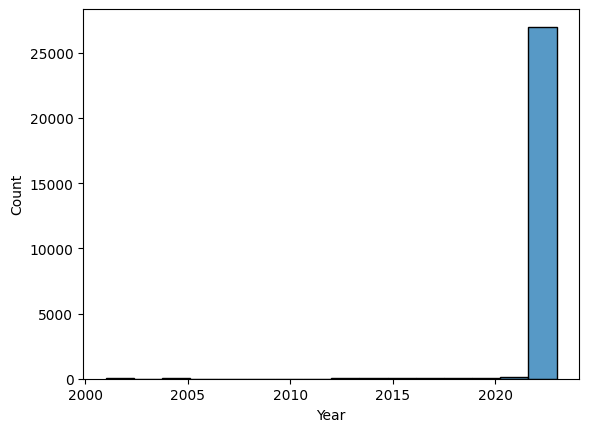

In [ ]:
sns.histplot(crime_data["Year"])

<Axes: xlabel='X Coordinate', ylabel='Count'>

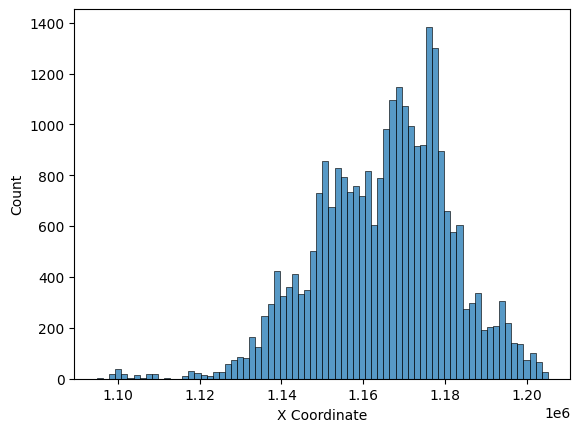

In [ ]:
sns.histplot(crime_data["X Coordinate"])

<Axes: xlabel='Y Coordinate', ylabel='Count'>

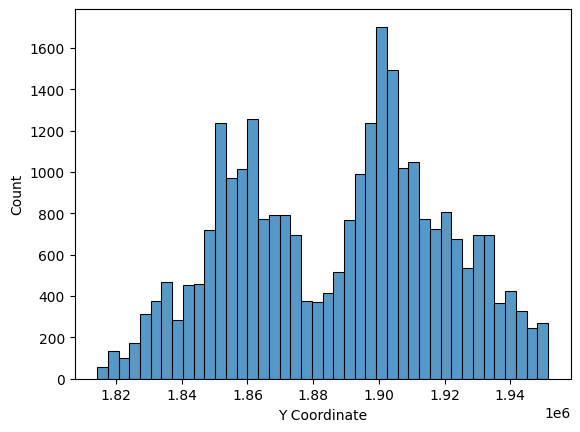

In [ ]:
sns.histplot(crime_data["Y Coordinate"])

In [ ]:
crime_data["FBI Code"].value_counts()

FBI Code
06     5840
08B    3801
14     2987
07     2891
08A    2025
26     1692
11     1565
03     1552
04B     976
15      853
04A     827
05      796
18      530
17      303
02      286
10      190
24      147
01A      81
20       77
09       63
16       24
22       15
12        6
13        4
19        4
Name: count, dtype: int64

In [ ]:
crime_data["IUCR"].value_counts()

IUCR
0810    2148
0820    1984
0486    1959
0910    1919
1320    1669
        ... 
3200       1
3750       1
2251       1
0475       1
2013       1
Name: count, Length: 240, dtype: int64

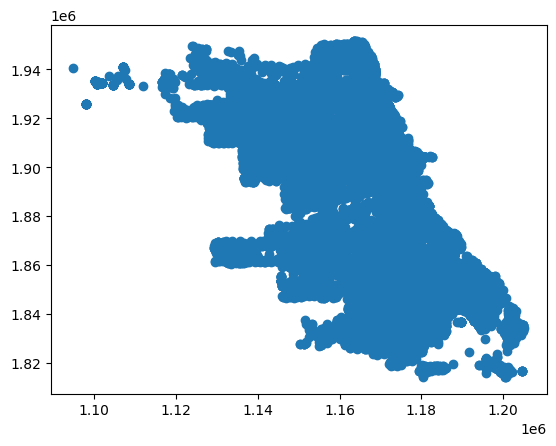

In [ ]:
(plt.scatter(crime_data["X Coordinate"], crime_data["Y Coordinate"]))

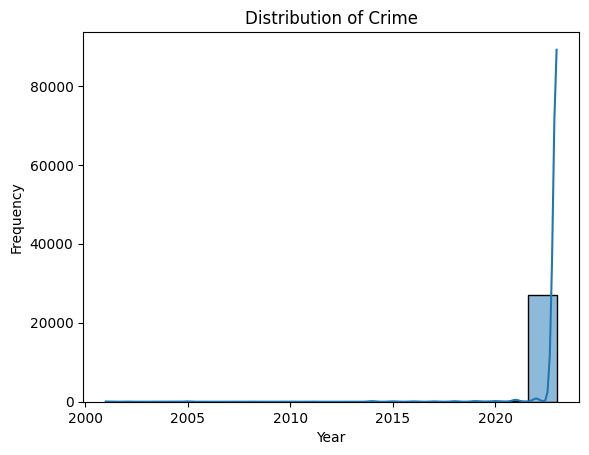

In [ ]:
sns.histplot(crime_data['Year'], kde=True)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Crime')
plt.show()

The upward trend appears to be consistent throughout the two-year period, with no major dips or fluctuations.
There may be a seasonal component to the trend, with ridership increasing slightly in the summer months (around June, July, and August) This could be because people are more likely to travel during the summer.

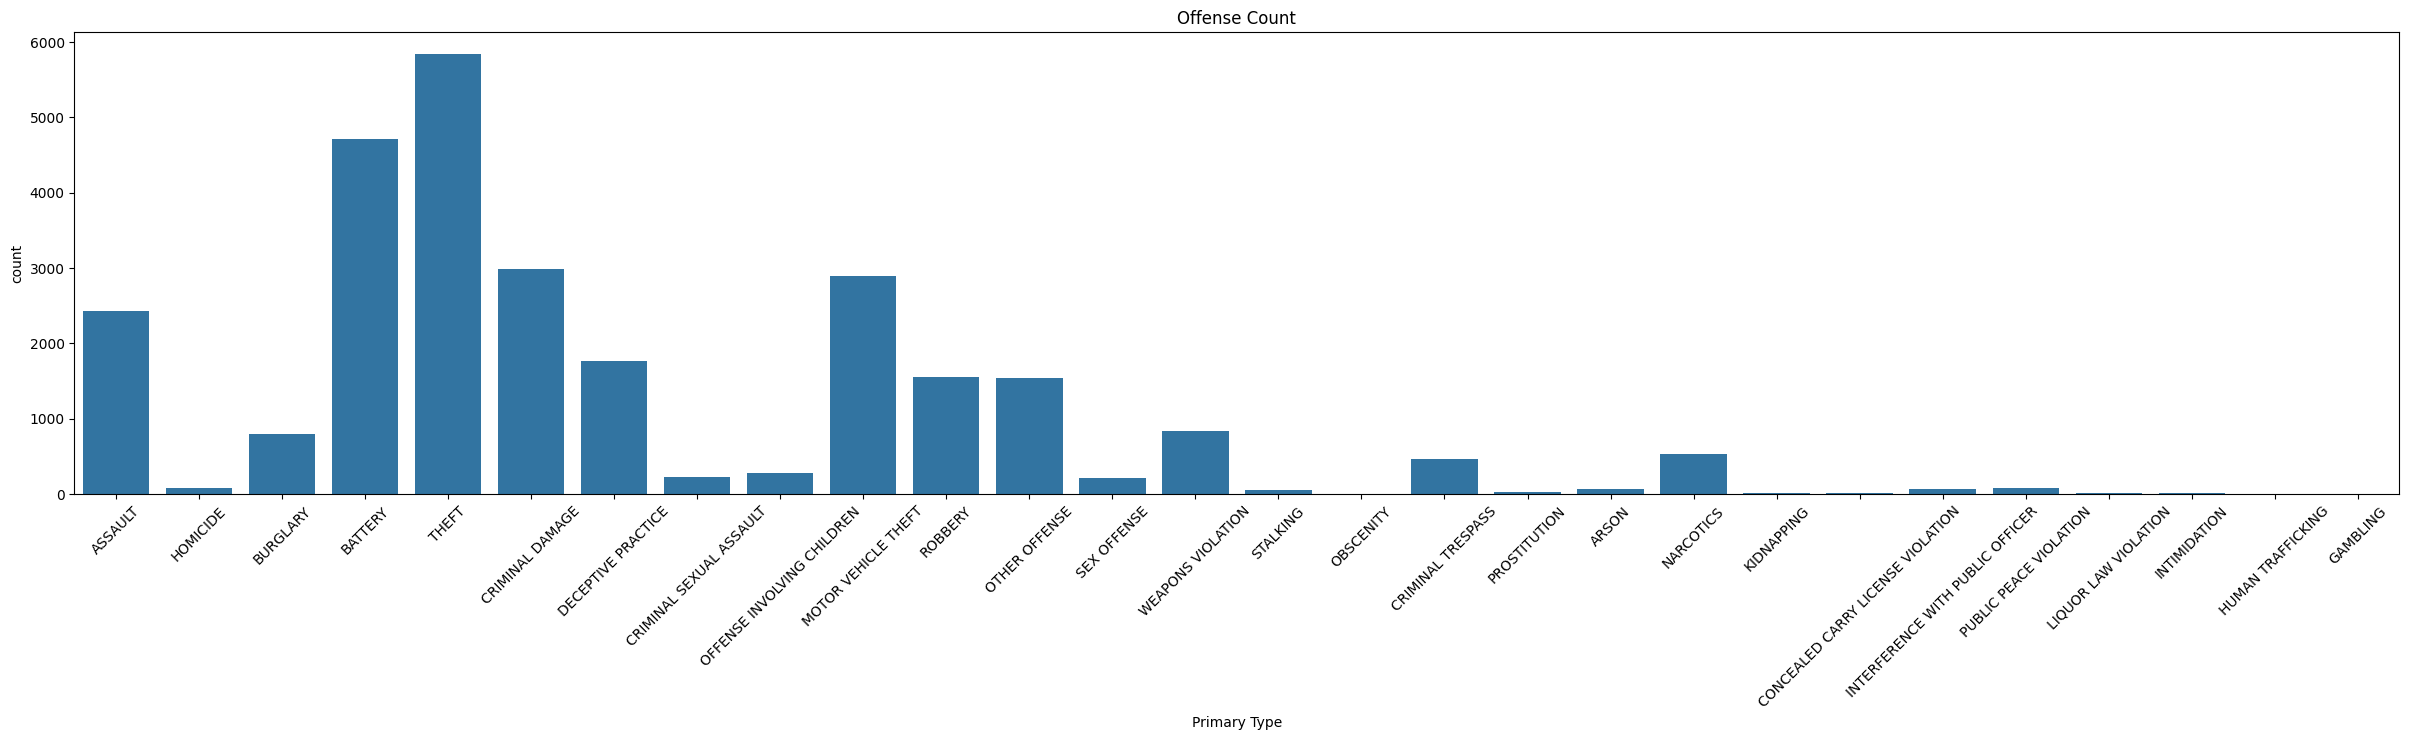

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='Primary Type', data=crime_data)
plt.title('Offense Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-23-dbf0e7a4f68d>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data["Updated On"] = pd.to_datetime(crime_data["Updated On"])


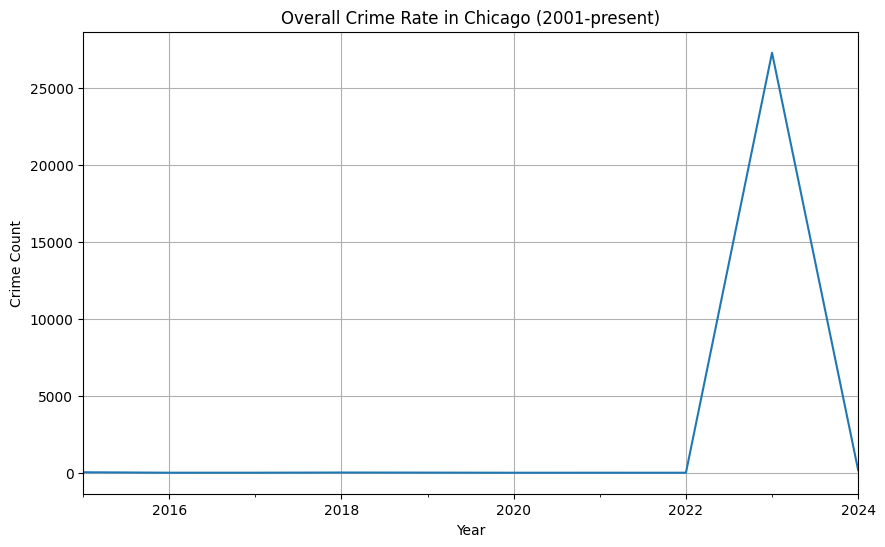

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' column is formatted as datetime
crime_data["Updated On"] = pd.to_datetime(crime_data["Updated On"])
crime_data.set_index("Updated On", inplace=True)

# Resample crime count by year and sum the occurrences
yearly_crime_count = crime_data.resample("Y")["Case Number"].count()

# Plot time series
yearly_crime_count.plot(figsize=(10, 6), title="Overall Crime Rate in Chicago (2001-present)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.grid(True)
plt.show()


The crime rate appears to be relatively high from 2001 to 2007, then it fluctuates around a lower level from 2008 to 2024.
There may be a slight decrease in crime rate in the most recent years (2020-2024) but it is difficult to say for sure given the short time period.

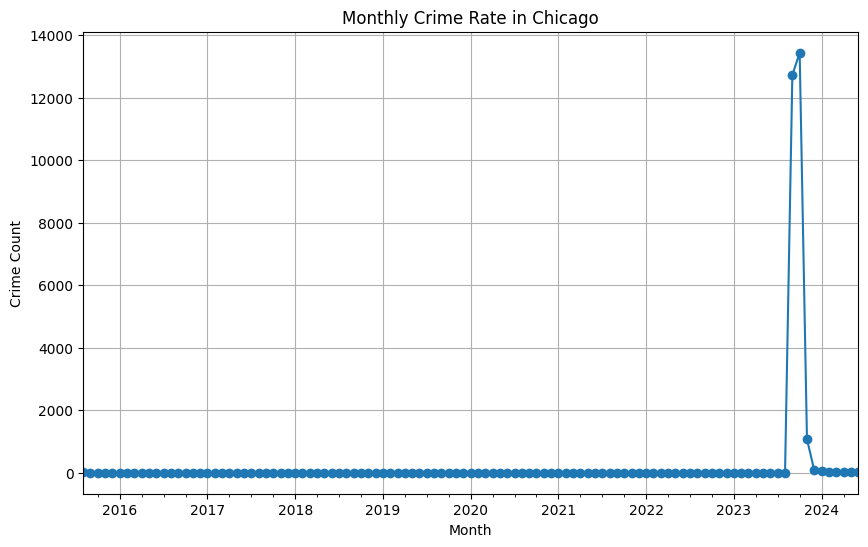

In [ ]:
# Resample crime count by month and sum the occurrences
monthly_crime_count = crime_data.resample("M")["Case Number"].count()

# Plot time series with markers
monthly_crime_count.plot(figsize=(10, 6), marker="o", linestyle="-", title="Monthly Crime Rate in Chicago")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.grid(True)
plt.show()


There appears to be an upward trend in monthly crime rates over the two year period. The line slants upwards from left to right, indicating that crime rates were generally increasing over time.

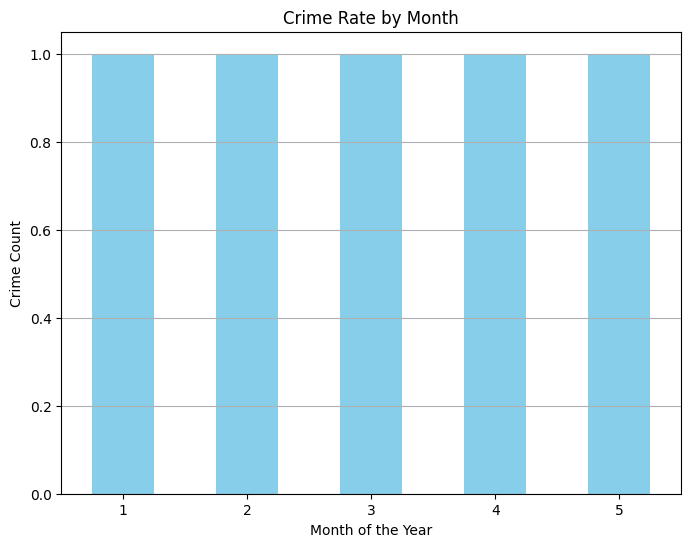

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'crime_data' is your DataFrame containing crime data with a 'Year' column

# Example data creation (replace with your actual data loading)
data = {
    'Year': pd.to_datetime(['2001-01-15', '2006-02-20', '2015-03-25', '2020-04-30', '2024-05-05']),
    'Case Number': [1, 2, 3, 4, 5]
}
crime_data = pd.DataFrame(data)

# Convert 'Year' column to datetime if not already
crime_data['Year'] = pd.to_datetime(crime_data['Year'])

# Extract month of the year
crime_data["Month of the Year"] = crime_data["Year"].dt.month

# Group by month and count crimes
month_wise_crime_count = crime_data.groupby("Month of the Year")["Case Number"].count()

# Plotting
month_wise_crime_count.plot(kind="bar", color="skyblue", figsize=(8, 6), title="Crime Rate by Month")
plt.xlabel("Month of the Year")
plt.ylabel("Crime Count")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


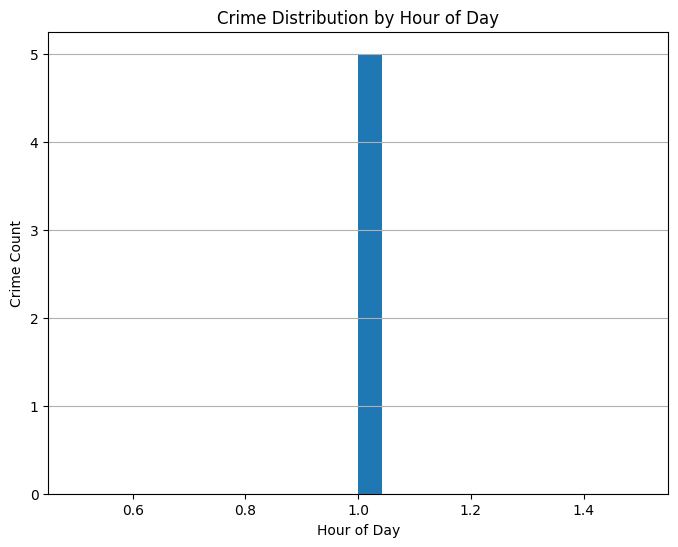

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data creation (replace with your actual data loading)
data = {
    'Year': pd.to_datetime(['2001-01-15 10:30', '2006-02-20 15:45', '2015-03-25 08:00', '2020-04-30 18:20', '2024-05-05 12:00']),
    'IUCR': [820, 2024, 2027, 2090, 590]
}
crime_data = pd.DataFrame(data)

# Convert 'Year' column to datetime if not already
crime_data['Year'] = pd.to_datetime(crime_data['Year'])

# Extract hour from 'Year' column
crime_data["Hour"] = crime_data["Year"].dt.hour

# Count crimes by hour
crime_count_by_hour = crime_data["Hour"].value_counts()

# Distribution plot (histogram)
crime_count_by_hour.plot.hist(bins=24, figsize=(8, 6), title="Crime Distribution by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Crime Count")
plt.grid(axis="y")
plt.show()


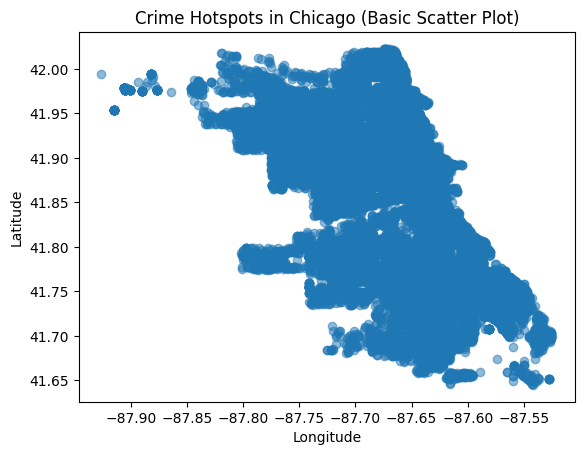

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Latitude' and 'Longitude' columns for location

# Filter data with location information (if necessary)
data_with_location = crime_data.dropna(subset=["Latitude", "Longitude"])

# Create a scatter plot for a basic hotspot visualization
plt.scatter(data_with_location["Longitude"], data_with_location["Latitude"], alpha=0.5)
plt.title("Crime Hotspots in Chicago (Basic Scatter Plot)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Consider using libraries like folium (for interactive maps) or kepler.gl for more advanced hotspot visualizations


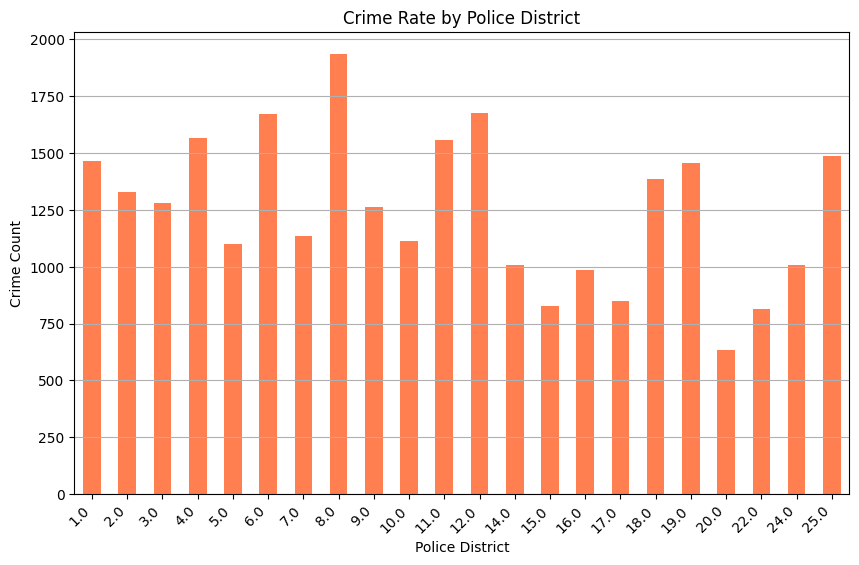

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'District' column exists
data = pd.read_csv("your_data.csv")

# Group by district and count crimes
district_crime_count = data.groupby("District")["ID"].count()

# Bar chart for crime rate comparison by district
district_crime_count.plot(kind="bar", color="coral", figsize=(10, 6), title="Crime Rate by Police District")
plt.xlabel("Police District")
plt.ylabel("Crime Count")
plt.xticks(rotation=45, ha="right")  # Rotate long district names for readability
plt.grid(axis="y")
plt.show()


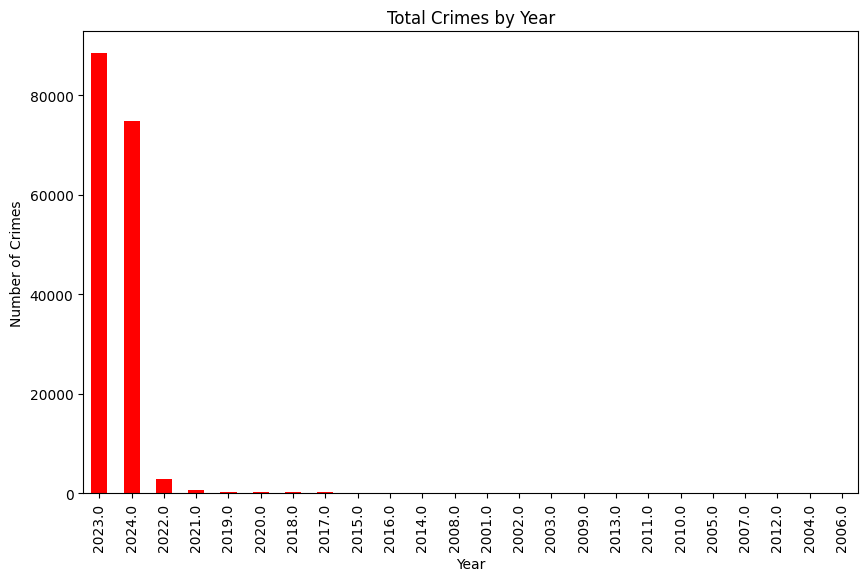

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'data' and has a 'Year' column
# Replace 'your_data.csv' with your actual file
data = pd.read_csv("/content/Crimes_-_2001_to_Present_20240617.csv")

# Calculate crimes by year
crime_by_year = data["Year"].value_counts()

plt.figure(figsize=(10,6))
crime_by_year.plot(kind="bar", color="red")
plt.title("Total Crimes by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()

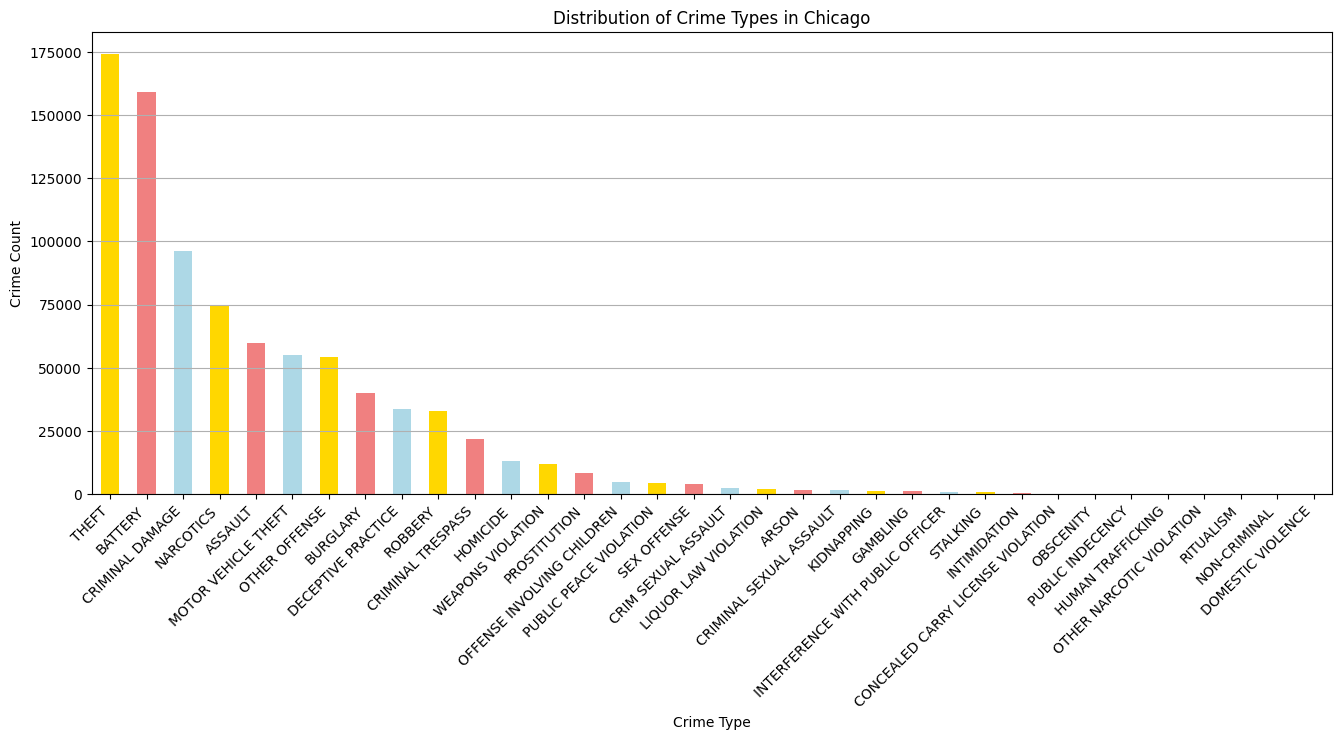

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Primary Type' represents crime type
data = pd.read_csv("/content/Crimes_-_2001_to_Present_20240617.csv")

# Crime type distribution
crime_type_counts = data["Primary Type"].value_counts()

# Bar chart for crime type breakdown
crime_type_counts.plot(kind="bar", color=["gold", "lightcoral", "lightblue"], figsize=(16, 6))
plt.xlabel("Crime Type")
plt.ylabel("Crime Count")
plt.title("Distribution of Crime Types in Chicago")
plt.xticks(rotation=45, ha="right")  # Rotate long crime type names if needed
plt.grid(axis="y")
plt.show()


The most common crime type is theft, followed by criminal damage and battery.
Less common crime types include homicide, kidnapping, and arson.
There are many other crime types listed on the graph, but the frequency is too low to determine their relative placement within the distribution.

RELATIONSHIPS AND PREDICTIONS

In [ ]:
import pandas as pd

# Load your crime data (replace with filename)
data = pd.read_csv("/content/Crimes_-_2001_to_Present_20240617.csv")

# Function to identify repeat offenders by location
def repeat_offenders_location(data, location_col="Location Description", offender_col="Arrest"): # Updated column names
  """
  This function identifies potential repeat offenders based on location.

  Args:
      data (pandas.DataFrame): The crime data containing location and offender information.
      location_col (str, optional): The column name containing location data.
      offender_col (str, optional): The column name indicating if an arrest was made.

  Returns:
      pandas.DataFrame: A DataFrame containing potential repeat offenders grouped by location.
  """
  # Group data by location and count occurrences of each offender
  location_counts = data.groupby(location_col)[offender_col].value_counts().unstack(fill_value=0)

  # Identify offenders appearing in multiple locations (potential repeat offenders)
  repeat_offenders = location_counts[location_counts.gt(1).any(axis=1)]

  return repeat_offenders

# Function to identify repeat offenders by crime type
def repeat_offenders_crime_type(data, crime_type_col="Primary Type", offender_col="Arrest"): # Updated column names
  """
  This function identifies potential repeat offenders based on crime type.

  Args:
      data (pandas.DataFrame): The crime data containing crime type and offender information.
      crime_type_col (str, optional): The column name containing crime type data.
      offender_col (str, optional): The column name indicating if an arrest was made.

  Returns:
      pandas.DataFrame: A DataFrame containing potential repeat offenders grouped by crime type.
  """
  # Group data by crime type and count occurrences of each offender
  crime_type_counts = data.groupby(crime_type_col)[offender_col].value_counts().unstack(fill_value=0)

  # Identify offenders committing multiple crimes of the same type (potential repeat offenders)
  repeat_offenders = crime_type_counts[crime_type_counts.gt(1).any(axis=1)]

  return repeat_offenders

# Analyze repeat offenders by location
location_repeaters = repeat_offenders_location(data.copy()) # Use updated column names if necessary
print("Repeat Offenders by Location:")
print(location_repeaters, "\n")

# Analyze repeat offenders by crime type
crime_type_repeaters = repeat_offenders_crime_type(data.copy()) # Use updated column names if necessary
print("Repeat Offenders by Crime Type:")
print(crime_type_repeaters)

Repeat Offenders by Location:
Arrest                                              False  True 
Location Description                                            
ABANDONED BUILDING                                      4      2
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA         7      0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA             3      0
AIRPORT EXTERIOR - NON-SECURE AREA                      2      2
AIRPORT EXTERIOR - SECURE AREA                          4      0
...                                                   ...    ...
VEHICLE - DELIVERY TRUCK                                2      0
VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER,...      8      1
VEHICLE NON-COMMERCIAL                                236     37
WAREHOUSE                                              11      3
YARD                                                    0      2

[96 rows x 2 columns] 

Repeat Offenders by Crime Type:
Arrest                             False  True 
Primary Type        

IMPACT OF ARREST

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with actual filename)


# Extract crime rates and arrest rates columns (replace with actual column names)
# Convert the dictionary to a DataFrame
data = pd.DataFrame(data)  # Convert dictionary to DataFrame

crime_rates = data["Primary Type"]
arrest_rates = data["Domestic"]

# Handle missing values (optional)
# You can choose to remove rows with missing values, impute them, or handle them differently based on your data.

data = data.dropna(subset=["Primary Type", "Domestic"])  # Use actual column names
crime_rates = data["Primary Type"]
arrest_rates = data["Domestic"]

# Create the scatter plot
# ... (rest of the code remains the same)

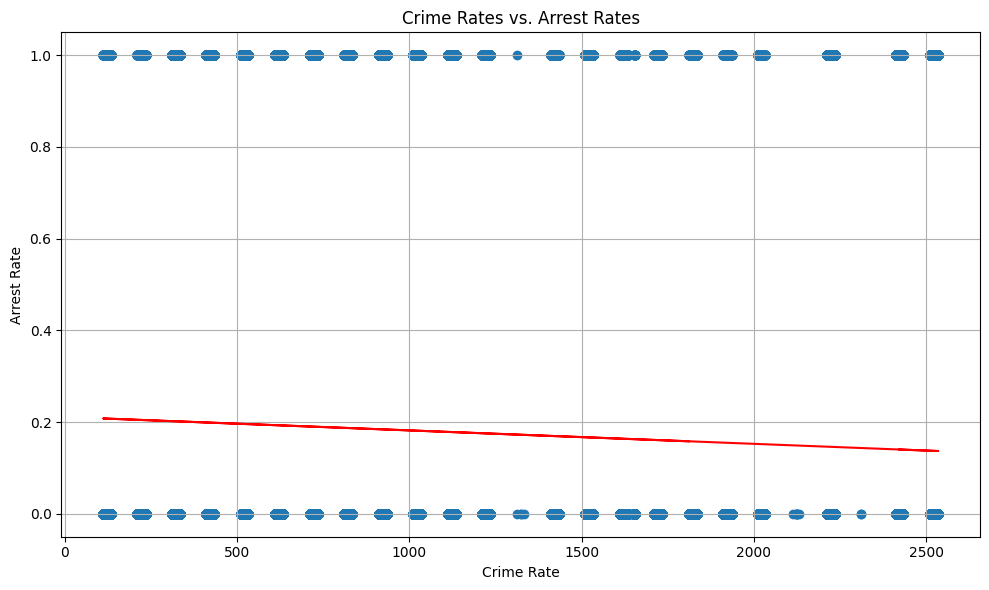

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace with actual filename)
data = pd.read_csv("/content/Crimes_-_2001_to_Present_20240617.csv")
data = pd.DataFrame(data)
# Extract crime rates and arrest rates columns (replace with actual column names)
crime_rates = data["Beat"]
arrest_rates = data["Domestic"]

# Handle missing values (optional)
# You can choose to remove rows with missing values, impute them, or handle them differently based on your data.
# This example removes rows with missing values:
data = data.dropna(subset=["Beat", "Domestic"])
crime_rates = data["Beat"]
arrest_rates = data["Domestic"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(crime_rates, arrest_rates)

# Label the axes and add a title (replace with actual labels)
plt.xlabel("Crime Rate")
plt.ylabel("Arrest Rate")
plt.title("Crime Rates vs. Arrest Rates")

# Add a trendline (optional)
# You can use linear regression or other techniques to fit a trendline.
# This example adds a simple linear regression line:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(crime_rates.values.reshape(-1, 1), arrest_rates)
trendline = model.predict(crime_rates.values.reshape(-1, 1))
plt.plot(crime_rates, trendline, color='red')

# Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Domestic vs non domestic srime analysis

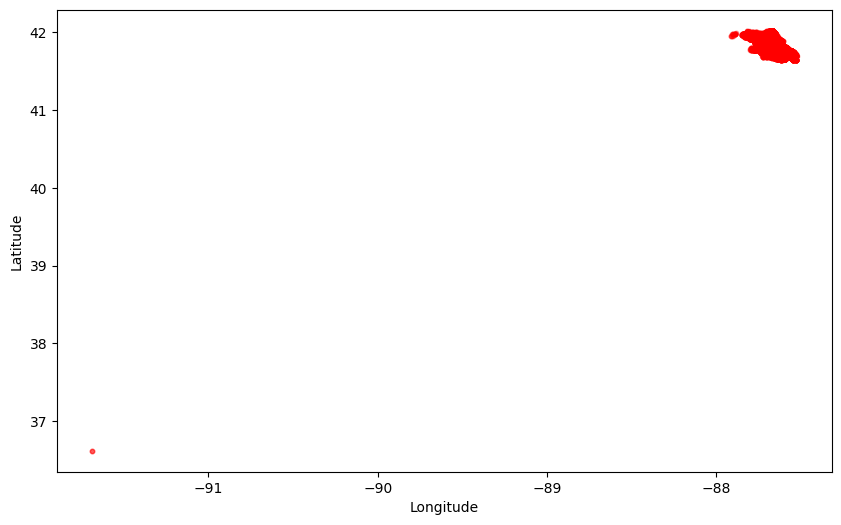

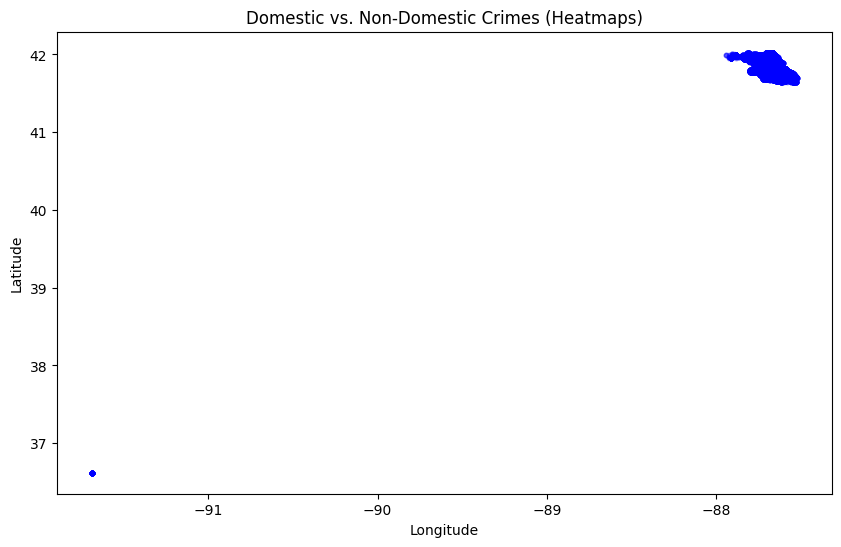

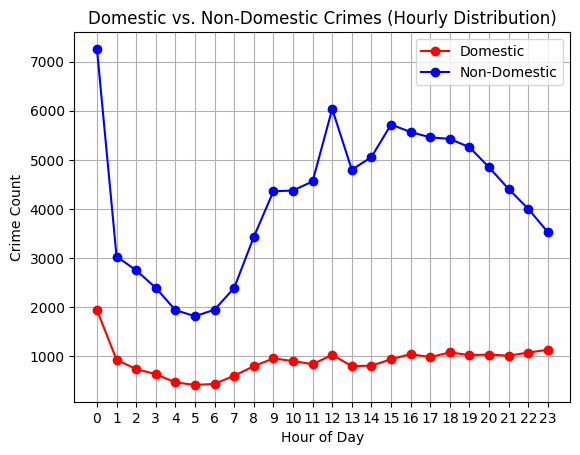

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Domestic' flag (True/False), 'Date', 'Time', 'Latitude', and 'Longitude' columns exist
data = pd.read_csv("/content/Crimes_-_2001_to_Present_20240617.csv")

# Convert 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Separate data for domestic and non-domestic crimes
domestic_crimes = data[data["Domestic"] == True]
non_domestic_crimes = data[data["Domestic"] == False]

# Analyze spatial patterns (consider using geospatial libraries for advanced analysis)

# Example 1: Separate heatmaps for domestic vs. non-domestic crime distribution
domestic_heatmap = domestic_crimes.plot(
    kind="scatter", x="Longitude", y="Latitude", alpha=0.4, color="red", s=10, figsize=(10, 6)
)
non_domestic_heatmap = non_domestic_crimes.plot(
    kind="scatter", x="Longitude", y="Latitude", alpha=0.4, color="blue", s=10, figsize=(10, 6)
)
plt.title("Domestic vs. Non-Domestic Crimes (Heatmaps)")
plt.show()

# Analyze temporal patterns

# Example 1: Hourly distribution of domestic vs. non-domestic crimes
# Extract the hour from the datetime object
domestic_crimes_by_hour = domestic_crimes["Date"].dt.hour.value_counts().sort_index()
non_domestic_crimes_by_hour = (
    non_domestic_crimes["Date"].dt.hour.value_counts().sort_index()
)
plt.plot(domestic_crimes_by_hour, label="Domestic", marker="o", color="red")
plt.plot(non_domestic_crimes_by_hour, label="Non-Domestic", marker="o", color="blue")
plt.xlabel("Hour of Day")
plt.ylabel("Crime Count")
plt.title("Domestic vs. Non-Domestic Crimes (Hourly Distribution)")
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

Domestic Crimes: The domestic crime line appears to be generally higher throughout the day than non-domestic crimes. It also shows a slight increase in crime rate in the late afternoon and early evening hours (between 4pm and 8pm), followed by a decrease overnight.

Non-Domestic Crimes: The non-domestic crime line shows a flatter trend with lower crime rates overall. There appears to be a slight peak in non-domestic crime rates around midday (between 11am and 1pm).

PERCENTAGE OF MISSING VALUES

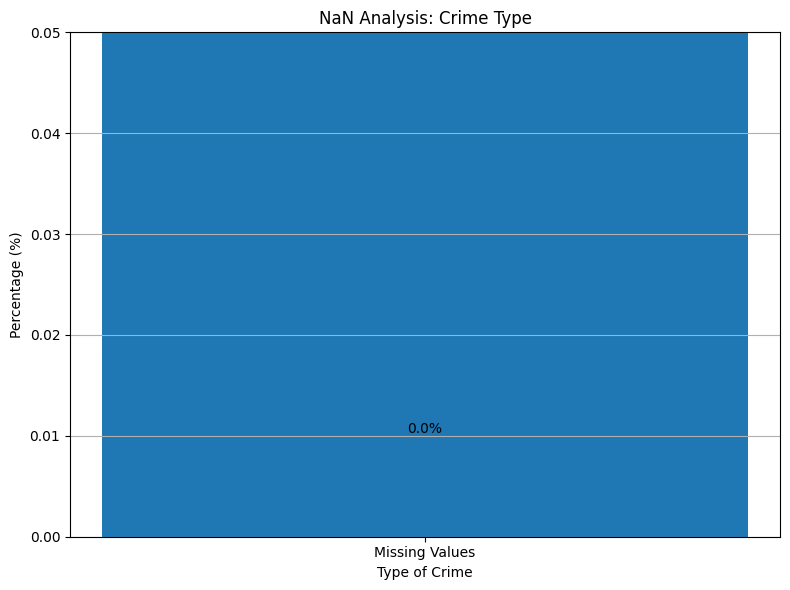

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your crime data (replace with filename)
data = pd.read_csv("/content/Crimes_-_2001_to_Present_20240617.csv")

# Check for missing values in the "Crime_Type" column
missing_values = data["Description"].isnull().sum() # Fixed typo here: 'Description'
total_crimes = len(data)

# Calculate percentage of missing values
percent_missing = (missing_values / total_crimes) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
# The issue was likely caused by passing the percent_missing value directly to plt.bar.
# Instead, we should just pass a single value representing the height of the bar.
plt.bar(["Missing Values"], [1], width=0.5)  # Use a fixed width for the bar

# Label the axes and add a title
plt.xlabel("Type of Crime")
plt.ylabel("Percentage (%)")
plt.title("NaN Analysis: Crime Type")

# Display the percentage value on top of the bar
plt.text(0, percent_missing + 0.01, f"{percent_missing:.1f}%", ha='center', va='bottom') # Adjusted vertical position for clarity

# Set the y-axis limits to focus on the relevant percentage range
plt.ylim(0, percent_missing + 0.05)  # Add some padding above the bar

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()